In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/uzbekistan.csv", index_col=0)
df.columns=['maydon','aholi']
df.index.name='Hudud'
df.sort_values(by='aholi',inplace=True)

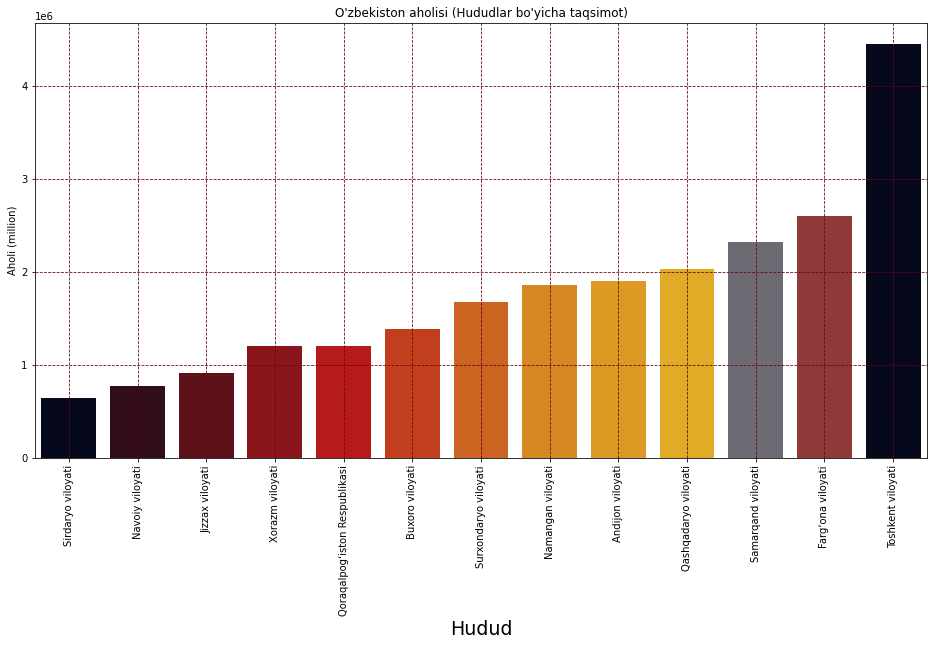

In [ ]:
colors=['#03071E','#370617','#6A040F','#9D0208','#D00000','#DC2F02','#E85D04','#F48C06','#FAA307','#FFBA08','#6d6875','#9e2a2b']
plt.figure(figsize=(16,8))
sns.barplot(x=df.index, y=df.aholi, palette=colors)
plt.grid(linestyle='--', linewidth=.8, color=colors[2])
plt.title("O'zbekiston aholisi (Hududlar bo'yicha taqsimot)")
plt.xlabel('Hudud', fontsize=19)
plt.ylabel('Aholi (million)',fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df2 = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/museum_visitors.csv", index_col=0, parse_dates=[0],usecols=[0,1])
df2.head()


,Avila Adobe
Date,
2014-01-01,24778
2014-02-01,18976
2014-03-01,25231
2014-04-01,26989
2014-05-01,36883


In [ ]:
df2['month']=[i.month for i in df2.index]
df2['year']=[i.year for i in df2.index]
df2.head()

,Avila Adobe,month,year
Date,,,
2014-01-01,24778,1,2014
2014-02-01,18976,2,2014
2014-03-01,25231,3,2014
2014-04-01,26989,4,2014
2014-05-01,36883,5,2014


In [ ]:
df2.groupby(['month','year']).max().head(10)

Avila Adobe
month year             
1     2014        24778
      2015        20438
      2016        19659
      2017        18792
      2018        16265
2     2014        18976
      2015        15578
      2016        17378
      2017        14035
      2018        14718

In [ ]:
df2_m=df2.groupby(['month','year']).max().unstack(level=0)
df2_m.fillna(method='ffill', inplace=True)
df2_m

Avila Adobe                                                        \
month          1        2        3        4        5        6        7    
year                                                                      
2014      24778.0  18976.0  25231.0  26989.0  36883.0  29487.0  32378.0   
2015      20438.0  15578.0  21297.0  26670.0  34383.0  30569.0  41242.0   
2016      19659.0  17378.0  20322.0  24521.0  31728.0  23696.0  31689.0   
2017      18792.0  14035.0  20680.0  25234.0  30029.0  22169.0  30831.0   
2018      16265.0  14718.0  19001.0  18966.0  25173.0  22171.0  23136.0   

                                                    
month       8        9        10       11       12  
year                                                
2014   37680.0  28473.0  27995.0  25691.0  18754.0  
2015   30700.0  20967.0  29764.0  24483.0  21426.0  
2016   25987.0  22897.0  25040.0  17760.0  20107.0  
2017   27009.0  23403.0  22164.0  17629.0  18339.0  
2018   20815.0  21020.0  19280.0  17163.0  18339.0

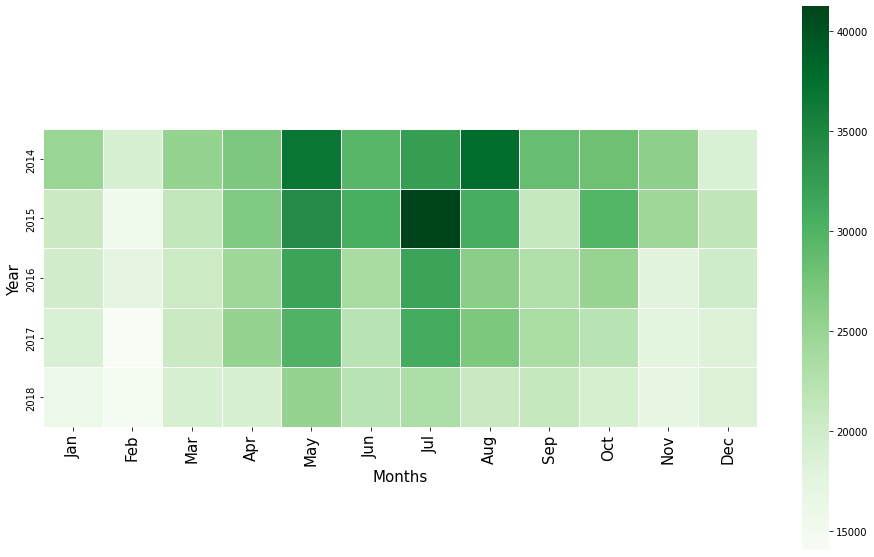

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df2_m, cmap='Greens', linewidth=1, square=True)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Year', fontsize=15)
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels, fontsize=15)
plt.show()

In [ ]:
df3 = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/flight_delays.csv")
df3.drop('US', axis=1, inplace=True)

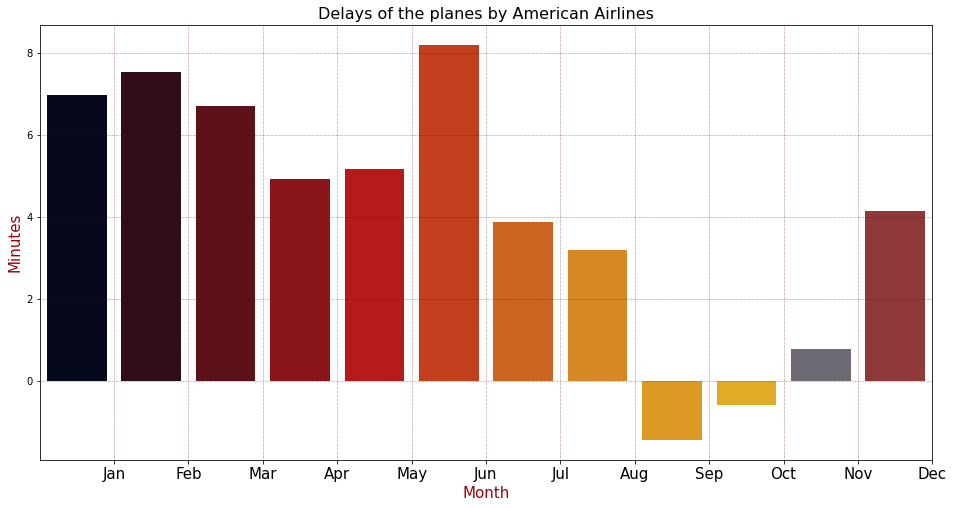

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=df3['Month'], y=df3.AA, palette=colors)
plt.title('Delays of the planes by American Airlines', fontsize=16)
plt.grid(color=colors[2],linewidth=.5,linestyle=':')
plt.xlabel('Month', fontsize=15, color=colors[3])
plt.ylabel('Minutes', fontsize=15, color=colors[3])
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels, fontsize=15)
plt.show()

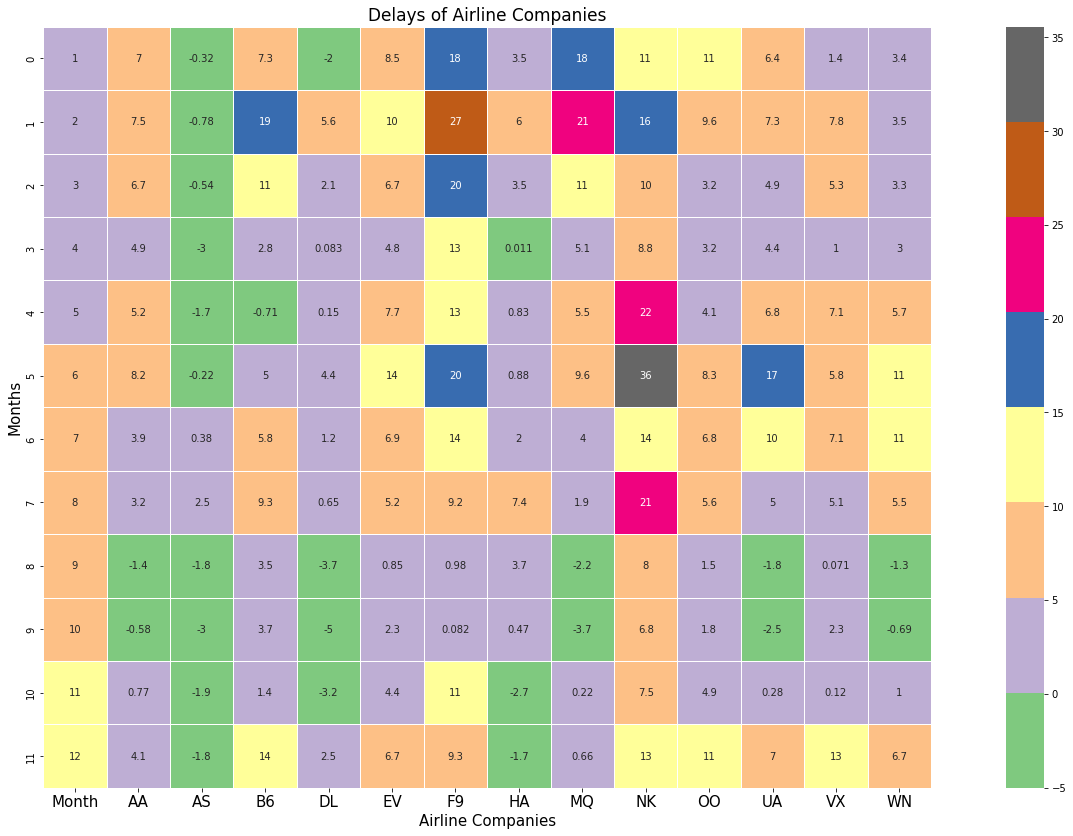

In [ ]:
plt.figure(figsize=(27,14))
sns.heatmap(data=df3, cmap="Accent", annot=True, square=True, linewidths=1,)
plt.title("Delays of Airline Companies", fontsize=17)
plt.xlabel("Airline Companies", fontsize=15)
plt.ylabel("Months", fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
df3_melted=pd.melt(df3, id_vars=['Month'], value_vars=['AA', 'AS', 'DL', 'WN', 'MQ'], var_name='Companies')
df3_melted.head()

,Month,Companies,value
0,1,AA,6.955843
1,2,AA,7.530204
2,3,AA,6.693587
3,4,AA,4.931778
4,5,AA,5.173878


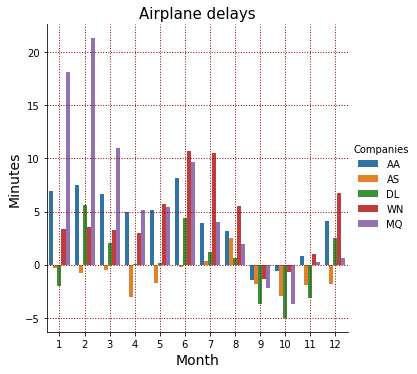

In [54]:
colors=['#03071E','#370617','#6A040F','#9D0208','#D00000','#DC2F02','#E85D04','#F48C06','#FAA307','#FFBA08','#6d6875','#9e2a2b']
sns.catplot(data=df3_melted, kind='bar', x='Month', y='value', hue='Companies')
plt.grid(color=colors[3], linestyle=':', linewidth=1)
plt.title('Airplane delays', fontsize=15)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Minutes', fontsize=14)
plt.savefig('Airplane delays.png')
plt.show()